### This notebook presented the important features for annual primary energy consumption from Random Forest Regressor

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Load data

In [2]:
df = pd.read_csv('data/data_3.csv',index_col=[0],parse_dates=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70 entries, 1949-01-01 to 2018-01-01
Data columns (total 18 columns):
primary-energy                  69 non-null float64
gdp                             69 non-null float64
population                      69 non-null float64
PPIACO                          70 non-null float64
miles-per-vehicle               68 non-null float64
crude_oil                       69 non-null float64
natural-gas                     64 non-null float64
pri-energy-production           69 non-null float64
Electricity-price               69 non-null float64
coal-price                      63 non-null float64
Energy-export                   69 non-null float64
Energy-import                   69 non-null float64
Heating-degree                  69 non-null float64
Cooling-degree                  69 non-null float64
CO2                             69 non-null float64
renewable                       69 non-null float64
Vehicle-fuel-economy            68 non-null f

In [3]:
df = df.dropna()

In [4]:
features = pd.DataFrame(df.columns)

In [5]:
df.head()

,primary-energy,gdp,population,PPIACO,miles-per-vehicle,crude_oil,natural-gas,pri-energy-production,Electricity-price,coal-price,Energy-export,Energy-import,Heating-degree,Cooling-degree,CO2,renewable,Vehicle-fuel-economy,renewable-energy-consumption
1949-01-01,31981.503,2008.9,149.2,0.263083,9498.0,2.54,0.06,31722.160,254511.334,36.14,1591.760,-143.602,4938.0,1101.0,2206.691,2973.984,13.1,2973.984
1950-01-01,34615.768,2184.0,152.3,0.273417,9321.0,2.51,0.07,35540.384,291443.326,35.41,1465.322,447.565,5367.0,871.0,2382.046,2977.718,12.8,2977.718
1951-01-01,36974.030,2360.0,154.9,0.304250,9460.0,2.53,0.07,38750.615,330284.583,33.67,2621.545,-729.119,5315.0,974.0,2526.687,2958.464,12.9,2958.464
1952-01-01,36747.825,2456.1,157.6,0.296000,9642.0,2.53,0.08,37916.913,356163.960,32.97,2365.131,-219.147,5085.0,1109.0,2473.374,2940.181,12.7,2940.181
1953-01-01,37664.468,2571.4,160.2,0.291750,9684.0,2.68,0.09,38180.796,396216.896,32.34,1866.013,447.029,4749.0,1105.0,2536.893,2831.460,12.7,2831.460


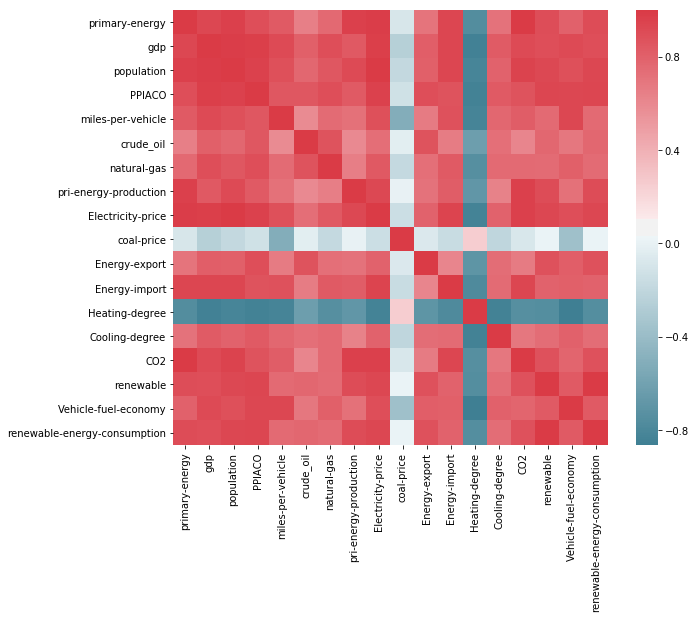

In [6]:
plt.figure(figsize=(10, 8))
corr_df = df.corr()
sns.heatmap(corr_df, xticklabels=corr_df.columns.values, 
            yticklabels=corr_df.columns.values,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square = True)

## Scale data

In [7]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
df_scaled = pd.DataFrame(sc_x.fit_transform(df), index=df.index, columns=df.columns)
df_scaled.head()

,primary-energy,gdp,population,PPIACO,miles-per-vehicle,crude_oil,natural-gas,pri-energy-production,Electricity-price,coal-price,Energy-export,Energy-import,Heating-degree,Cooling-degree,CO2,renewable,Vehicle-fuel-economy,renewable-energy-consumption
1949-01-01,-1.896092,-1.324379,-1.728513,-1.152869,-1.026336,-0.716606,-0.856606,-2.284011,-1.563417,0.464235,-1.075829,-1.334873,0.236713,-0.221649,-1.926772,-1.264919,-0.592169,-1.267994
1950-01-01,-1.772726,-1.281451,-1.661693,-1.132614,-1.200833,-0.718003,-0.851454,-1.981082,-1.530988,0.395112,-1.149534,-1.270481,1.359498,-1.860268,-1.773867,-1.262578,-0.733483,-1.265645
1951-01-01,-1.662284,-1.238303,-1.605649,-1.072177,-1.063799,-0.717072,-0.851454,-1.726390,-1.496882,0.230351,-0.475534,-1.398651,1.223403,-1.126451,-1.647744,-1.274648,-0.686378,-1.277754
1952-01-01,-1.672878,-1.214743,-1.547451,-1.088348,-0.884373,-0.717072,-0.846302,-1.792534,-1.474158,0.164069,-0.625006,-1.343102,0.621443,-0.164653,-1.694231,-1.286110,-0.780587,-1.289252
1953-01-01,-1.629950,-1.186476,-1.491407,-1.096679,-0.842968,-0.710090,-0.841150,-1.771598,-1.438989,0.104414,-0.915958,-1.270539,-0.257941,-0.193151,-1.638844,-1.354267,-0.780587,-1.357625


In [8]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63 entries, 1949-01-01 to 2011-01-01
Data columns (total 18 columns):
primary-energy                  63 non-null float64
gdp                             63 non-null float64
population                      63 non-null float64
PPIACO                          63 non-null float64
miles-per-vehicle               63 non-null float64
crude_oil                       63 non-null float64
natural-gas                     63 non-null float64
pri-energy-production           63 non-null float64
Electricity-price               63 non-null float64
coal-price                      63 non-null float64
Energy-export                   63 non-null float64
Energy-import                   63 non-null float64
Heating-degree                  63 non-null float64
Cooling-degree                  63 non-null float64
CO2                             63 non-null float64
renewable                       63 non-null float64
Vehicle-fuel-economy            63 non-null f

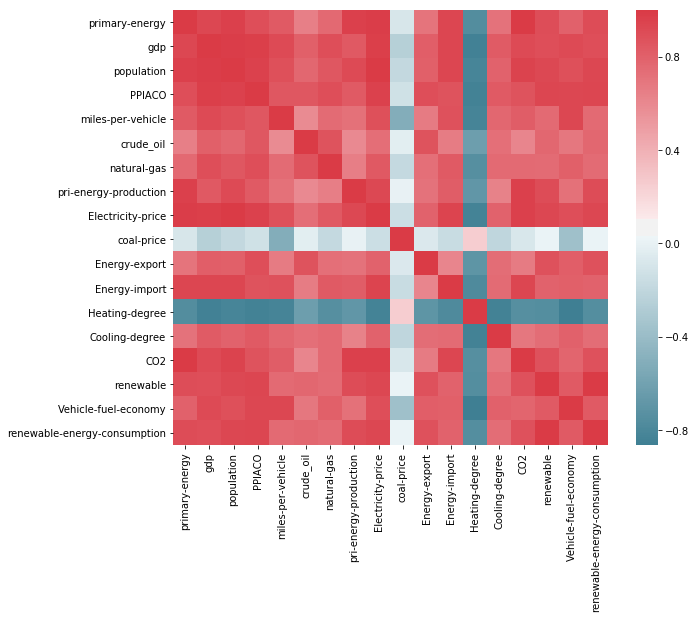

In [9]:
plt.figure(figsize=(10, 8))
corr_dfscale = df_scaled.corr()
sns.heatmap(corr_dfscale, xticklabels=corr_dfscale.columns.values, 
            yticklabels=corr_dfscale.columns.values,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
           square = True)

## Stationary test

In [10]:
# Perform Dickey-fuller test  for stationality

from statsmodels.tsa.stattools import adfuller

for i in df_scaled.columns: 
    x = df_scaled[i].values
    result = adfuller(x)
    print('\033[1m' + i + '\033[0m')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('')

primary-energy
ADF Statistic: -2.0494888390295136
p-value: 0.265304042221584

gdp
ADF Statistic: 1.5357015151286106
p-value: 0.9976512604047346

population
ADF Statistic: -0.17093839027062707
p-value: 0.9418981882536221

PPIACO
ADF Statistic: 1.0096403689532272
p-value: 0.9943666313598584

miles-per-vehicle
ADF Statistic: -1.2432712312344643
p-value: 0.6547102067065722

crude_oil
ADF Statistic: 0.4745336591245697
p-value: 0.9840781650078069

natural-gas
ADF Statistic: 0.5831519608870717
p-value: 0.9871929075223187

pri-energy-production
ADF Statistic: -2.2337011136323697
p-value: 0.19424199783903517

Electricity-price
ADF Statistic: -0.43442435069725494
p-value: 0.904190545611266

coal-price
ADF Statistic: -2.6705302518397107
p-value: 0.079278116371863

Energy-export
ADF Statistic: 1.2348877453666731
p-value: 0.9962182794125071

Energy-import
ADF Statistic: -1.5050772259669325
p-value: 0.5309982293022195

Heating-degree
ADF Statistic: -0.8123144942578385
p-value: 0.8154779880139532

Co

## Make a differencing

In [11]:
diff = df_scaled.diff().dropna()
diff.head()

,primary-energy,gdp,population,PPIACO,miles-per-vehicle,crude_oil,natural-gas,pri-energy-production,Electricity-price,coal-price,Energy-export,Energy-import,Heating-degree,Cooling-degree,CO2,renewable,Vehicle-fuel-economy,renewable-energy-consumption
1950-01-01,0.123367,0.042928,0.066821,0.020255,-0.174496,-0.001396,0.005152,0.302929,0.032429,-0.069123,-0.073705,0.064393,1.122786,-1.638619,0.152905,0.002341,-0.141313,0.002348
1951-01-01,0.110441,0.043148,0.056043,0.060437,0.137034,0.000931,0.000000,0.254692,0.034105,-0.164760,0.674001,-0.128170,-0.136095,0.733816,0.126123,-0.012070,0.047104,-0.012109
1952-01-01,-0.010594,0.023560,0.058199,-0.016171,0.179425,0.000000,0.005152,-0.066144,0.022724,-0.066283,-0.149472,0.055548,-0.601960,0.961798,-0.046488,-0.011462,-0.094209,-0.011498
1953-01-01,0.042928,0.028267,0.056043,-0.008330,0.041406,0.006982,0.005152,0.020936,0.035169,-0.059655,-0.290952,0.072563,-0.879385,-0.028498,0.055387,-0.068157,0.000000,-0.068373
1954-01-01,-0.048006,-0.003555,0.060354,0.001633,-0.077882,0.004655,0.005152,-0.131888,0.024539,-0.271759,-0.098931,0.022280,0.562701,-0.142489,-0.099963,-0.048498,0.000000,-0.048651


In [12]:
for i in diff.columns: 
    x = diff[i].values
    result = adfuller(x)
    print('\033[1m' + i + '\033[0m')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('')

primary-energy
ADF Statistic: -6.393095133621972
p-value: 2.0824755373024927e-08

gdp
ADF Statistic: -4.92392971630156
p-value: 3.1320796714311215e-05

population
ADF Statistic: -2.1555948395418407
p-value: 0.22275466999857402

PPIACO
ADF Statistic: -1.9083261516579564
p-value: 0.3281544211146595

miles-per-vehicle
ADF Statistic: -5.984164376100074
p-value: 1.80876028308576e-07

crude_oil
ADF Statistic: -3.2917353016162756
p-value: 0.015251972987464642

natural-gas
ADF Statistic: -1.8117808232226535
p-value: 0.37462872648491197

pri-energy-production
ADF Statistic: -5.178426813985657
p-value: 9.72890683054279e-06

Electricity-price
ADF Statistic: -8.242416487168132
p-value: 5.6702428027903e-13

coal-price
ADF Statistic: -5.11020256322575
p-value: 1.3371663458872777e-05

Energy-export
ADF Statistic: -2.5678145918842863
p-value: 0.09983344834923286

Energy-import
ADF Statistic: -4.162761769550069
p-value: 0.0007613436020096483

Heating-degree
ADF Statistic: -7.662794456776413
p-value: 1.

## Final data

In [13]:
data = diff.drop(axis=1,columns=['population','PPIACO','natural-gas'])
data.head()

,primary-energy,gdp,miles-per-vehicle,crude_oil,pri-energy-production,Electricity-price,coal-price,Energy-export,Energy-import,Heating-degree,Cooling-degree,CO2,renewable,Vehicle-fuel-economy,renewable-energy-consumption
1950-01-01,0.123367,0.042928,-0.174496,-0.001396,0.302929,0.032429,-0.069123,-0.073705,0.064393,1.122786,-1.638619,0.152905,0.002341,-0.141313,0.002348
1951-01-01,0.110441,0.043148,0.137034,0.000931,0.254692,0.034105,-0.164760,0.674001,-0.128170,-0.136095,0.733816,0.126123,-0.012070,0.047104,-0.012109
1952-01-01,-0.010594,0.023560,0.179425,0.000000,-0.066144,0.022724,-0.066283,-0.149472,0.055548,-0.601960,0.961798,-0.046488,-0.011462,-0.094209,-0.011498
1953-01-01,0.042928,0.028267,0.041406,0.006982,0.020936,0.035169,-0.059655,-0.290952,0.072563,-0.879385,-0.028498,0.055387,-0.068157,0.000000,-0.068373
1954-01-01,-0.048006,-0.003555,-0.077882,0.004655,-0.131888,0.024539,-0.271759,-0.098931,0.022280,0.562701,-0.142489,-0.099963,-0.048498,0.000000,-0.048651


In [14]:
data.shape

(62, 15)

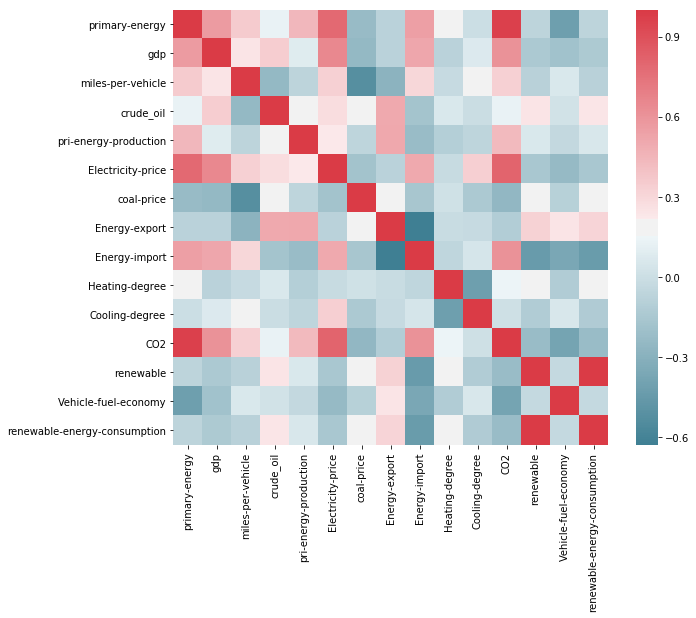

In [15]:
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
           square = True)

In [16]:
corr

,primary-energy,gdp,miles-per-vehicle,crude_oil,pri-energy-production,Electricity-price,coal-price,Energy-export,Energy-import,Heating-degree,Cooling-degree,CO2,renewable,Vehicle-fuel-economy,renewable-energy-consumption
primary-energy,1.000000,0.569711,0.355214,0.128083,0.445746,0.796278,-0.232272,-0.081970,0.551638,0.184679,-0.002838,0.974076,-0.068286,-0.414572,-0.067705
gdp,0.569711,1.000000,0.242718,0.346400,0.083726,0.651251,-0.244399,-0.076323,0.522053,-0.080727,0.071207,0.609042,-0.139411,-0.187483,-0.137490
miles-per-vehicle,0.355214,0.242718,1.000000,-0.244550,-0.067034,0.332572,-0.521616,-0.282594,0.305061,-0.029595,0.184179,0.333183,-0.087269,0.058605,-0.083440
crude_oil,0.128083,0.346400,-0.244550,1.000000,0.180450,0.279299,0.154738,0.506130,-0.175291,0.061468,-0.009542,0.129568,0.246920,0.024603,0.236862
pri-energy-production,0.445746,0.083726,-0.067034,0.180450,1.000000,0.223573,-0.061107,0.512150,-0.223415,-0.104329,-0.062470,0.429851,0.061849,-0.040095,0.056827
Electricity-price,0.796278,0.651251,0.332572,0.279299,0.223573,1.000000,-0.180676,-0.081382,0.509623,-0.023378,0.344294,0.809904,-0.154876,-0.237867,-0.156324
coal-price,-0.232272,-0.244399,-0.521616,0.154738,-0.061107,-0.180676,1.000000,0.175103,-0.162985,0.019061,-0.143427,-0.258799,0.178040,-0.092476,0.176858
Energy-export,-0.081970,-0.076323,-0.282594,0.506130,0.512150,-0.081382,0.175103,1.000000,-0.629499,-0.015359,-0.027209,-0.109735,0.331556,0.247665,0.318337
Energy-import,0.551638,0.522053,0.305061,-0.175291,-0.223415,0.509623,-0.162985,-0.629499,1.000000,-0.053971,0.040293,0.608415,-0.443116,-0.364342,-0.435512
Heating-degree,0.184679,-0.080727,-0.029595,0.061468,-0.104329,-0.023378,0.019061,-0.015359,-0.053971,1.000000,-0.415618,0.145245,0.214059,-0.119211,0.211877


## Split data

In [17]:
x_train = data.iloc[:44,1:]
y_train = pd.DataFrame(diff.iloc[:44,0])

x_test = data.iloc[44:,1:]
y_test = pd.DataFrame(diff.iloc[44:,0])

In [18]:
x_train.shape

(44, 14)

## Random forest

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=5)
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=5, verbose=0, warm_start=False)

In [20]:
print(rf.feature_importances_)

[0.00291827 0.00301622 0.0094561  0.00503397 0.02641896 0.00314716
 0.0028106  0.00169956 0.00495763 0.0012514  0.93450356 0.00098715
 0.0024382  0.00136123]


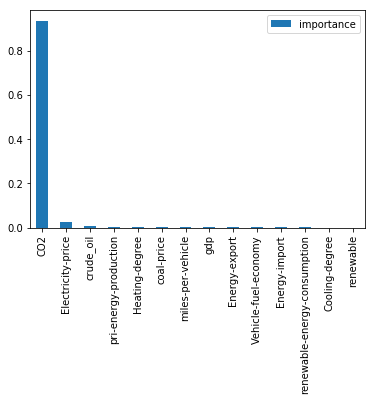

In [21]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.plot(kind='bar')



(0, 0.04)

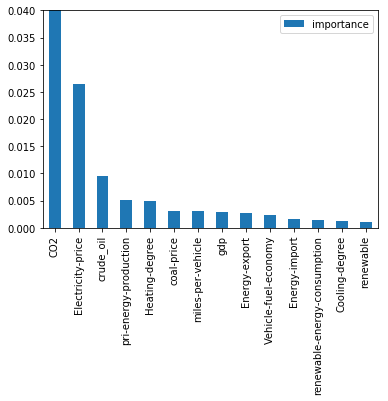

In [22]:
feature_importances.plot(kind='bar')
plt.ylim([0,0.04])

In [23]:
training_accuracy = rf.score(x_train, y_train)
test_accuracy = rf.score(x_test, y_test)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

Accuracy on training data: 0.980149
Accuracy on test data:     0.807685


In [24]:
feature_importances

,importance
CO2,0.934504
Electricity-price,0.026419
crude_oil,0.009456
pri-energy-production,0.005034
Heating-degree,0.004958
coal-price,0.003147
miles-per-vehicle,0.003016
gdp,0.002918
Energy-export,0.002811
Vehicle-fuel-economy,0.002438


## Feature importances are CO2, electricity-price and crude oil